# Bank Marketing Model

## Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

There are four datasets: 
* bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
* bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
* bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 
* bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). 
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). 

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

## Attribute Information:

Input variables:

1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')
8. contact: contact communication type (categorical: 'cellular','telephone') 
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
16. emp.var.rate: employment variation rate quarterly indicator (numeric)
17. cons.price.idx: consumer price index monthly indicator (numeric) 
18. cons.conf.idx: consumer confidence index monthly indicator (numeric) 
19. euribor3m: euribor 3 month rate daily indicator (numeric)
20. nr.employed: number of employees quarterly indicator (numeric)

Output variable (desired target):

21. y has the client subscribed a term deposit? (binary: 'yes','no')

# EDA

In [1]:
from platform import python_version
assert(python_version() == "3.8.5")

In [2]:
import os
import matplotlib.pyplot as plt
import urllib
import pandas as pd
import numpy as np
from zipfile import ZipFile
import seaborn as sns

### GLOBAL VARS

In [19]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
current_file = os.path.dirname(os.getcwd())
TEST = False
random = 123

In [66]:
save_path = current_file + "/data/bankmarketing.zip"
link = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"

def download_files(save_path, link):
    if not os.path.exists(save_path):
        urllib.request.urlretrieve(link, save_path)
    
download_files(save_path, link)
zip_file = ZipFile(save_path)
df = pd.read_csv(zip_file.open('bank-additional/bank-additional-full.csv'), sep = ";")
df.head(100)

age          job   marital            education  default housing loan  \
0    56    housemaid   married             basic.4y       no      no   no   
1    57     services   married          high.school  unknown      no   no   
2    37     services   married          high.school       no     yes   no   
3    40       admin.   married             basic.6y       no      no   no   
4    56     services   married          high.school       no      no  yes   
..  ...          ...       ...                  ...      ...     ...  ...   
95   45     services   married  professional.course       no     yes   no   
96   42   management   married    university.degree       no      no   no   
97   53       admin.  divorced    university.degree  unknown      no   no   
98   37   technician    single  professional.course       no      no   no   
99   44  blue-collar   married             basic.6y       no      no   no   

      contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   telephone   may         mon  ...         1    999         0  nonexistent   
1   telephone   may         mon  ...         1    999         0  nonexistent   
2   telephone   may         mon  ...         1    999         0  nonexistent   
3   telephone   may         mon  ...         1    999         0  nonexistent   
4   telephone   may         mon  ...         1    999         0  nonexistent   
..        ...   ...         ...  ...       ...    ...       ...          ...   
95  telephone   may         mon  ...         1    999         0  nonexistent   
96  telephone   may         mon  ...         1    999         0  nonexistent   
97  telephone   may         mon  ...         1    999         0  nonexistent   
98  telephone   may         mon  ...         1    999         0  nonexistent   
99  telephone   may         mon  ...         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93.994          -36.4      4.857       5191.0  no  
1           1.1          93.994          -36.4      4.857       5191.0  no  
2           1.1          93.994          -36.4      4.857       5191.0  no  
3           1.1          93.994          -36.4      4.857       5191.0  no  
4           1.1          93.994          -36.4      4.857       5191.0  no  
..          ...             ...            ...        ...          ...  ..  
95          1.1          93.994          -36.4      4.857       5191.0  no  
96          1.1          93.994          -36.4      4.857       5191.0  no  
97          1.1          93.994          -36.4      4.857       5191.0  no  
98          1.1          93.994          -36.4      4.857       5191.0  no  
99          1.1          93.994          -36.4      4.857       5191.0  no  

[100 rows x 21 columns]

In [5]:
df.isna().mean()

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

In [6]:
df.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

/usr/local/Caskroom/miniconda/base/envs/bankmarketing/lib/python3.8/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


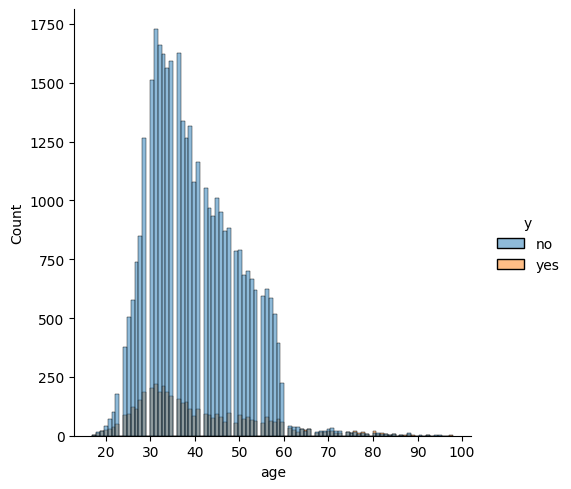

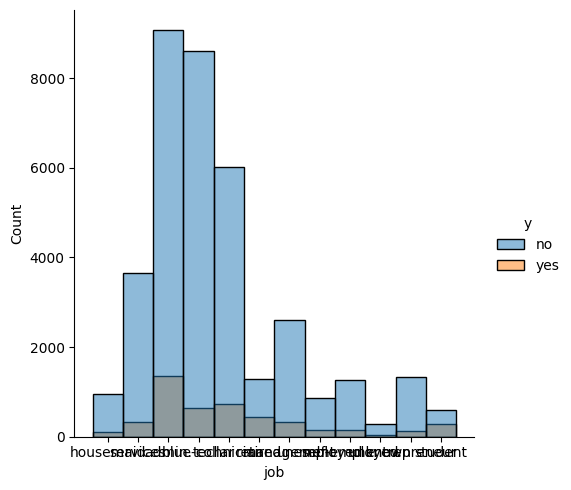

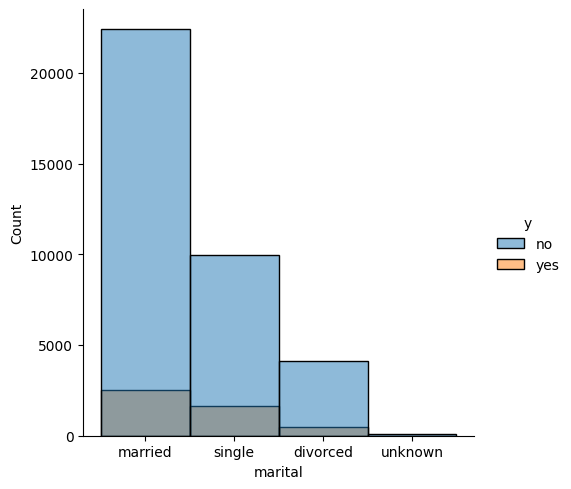

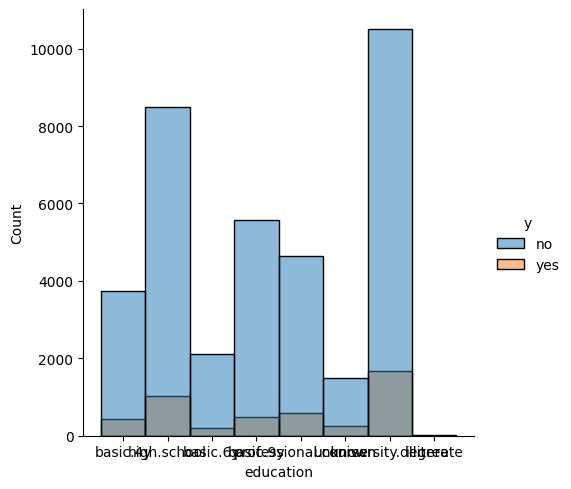

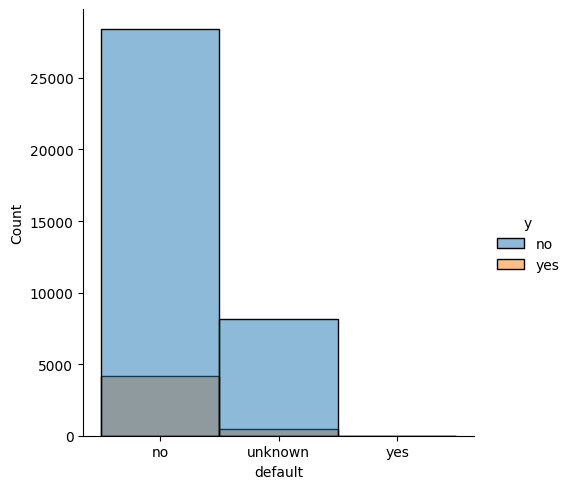

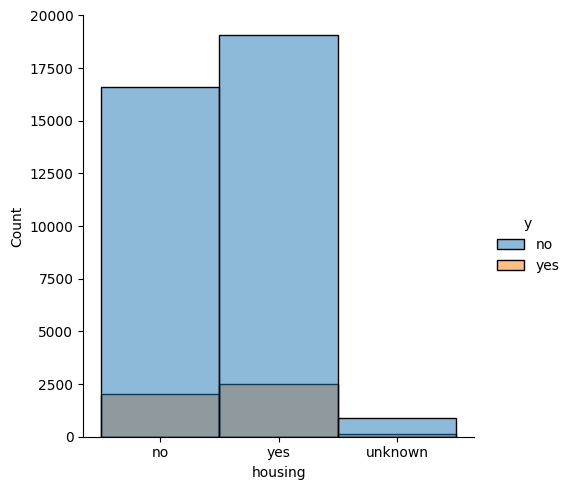

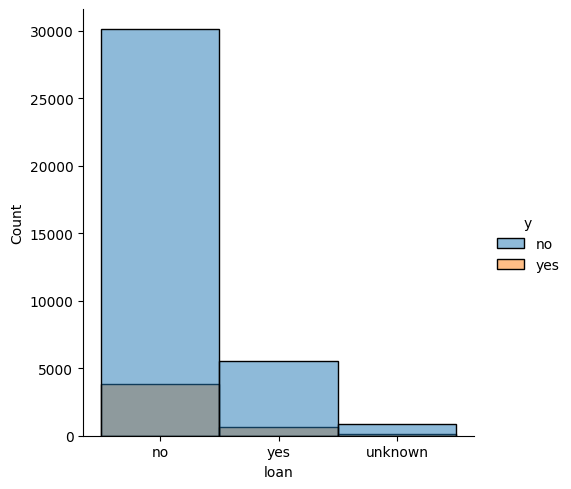

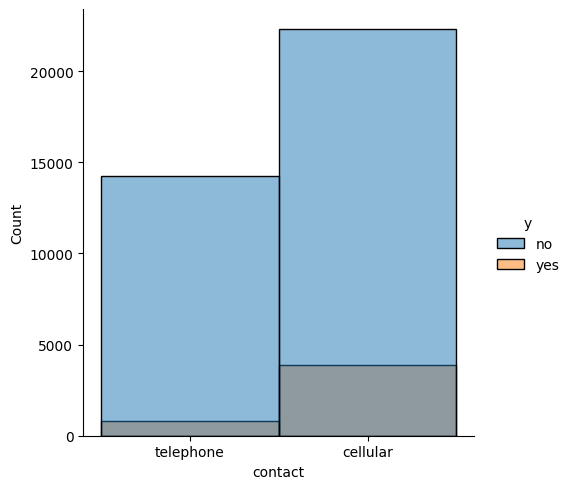

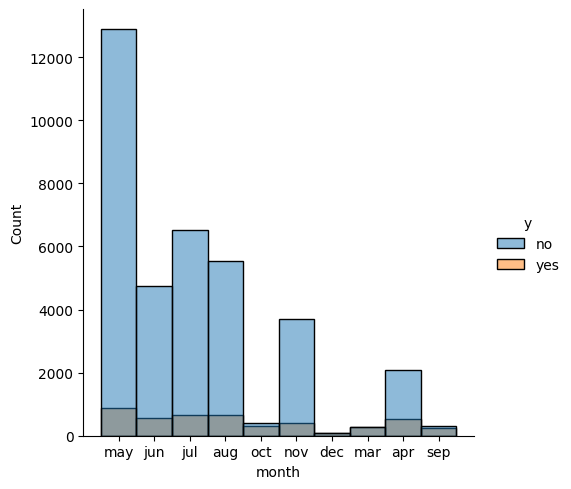

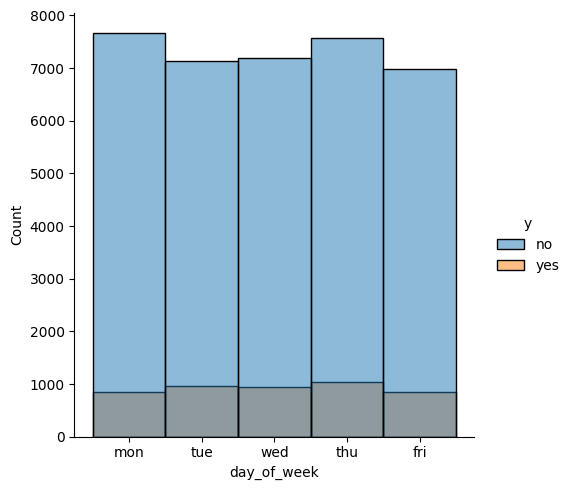

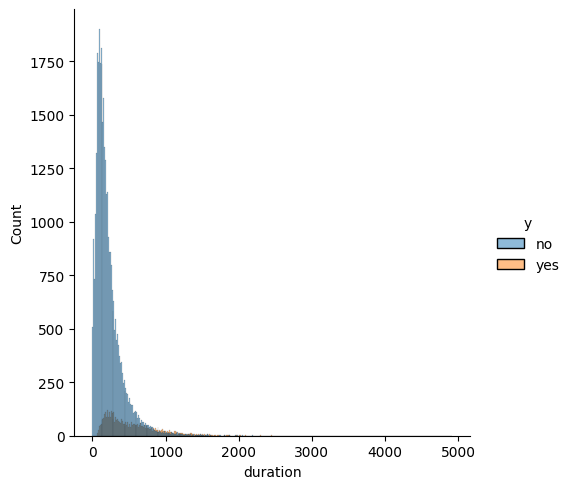

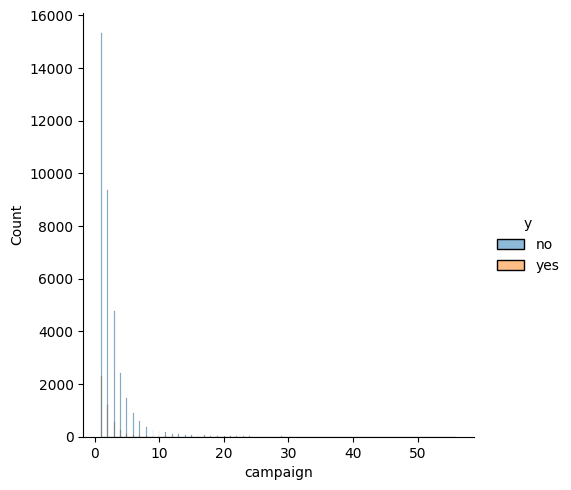

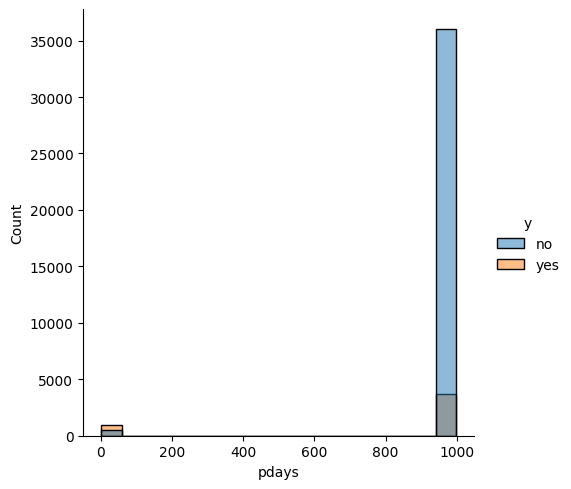

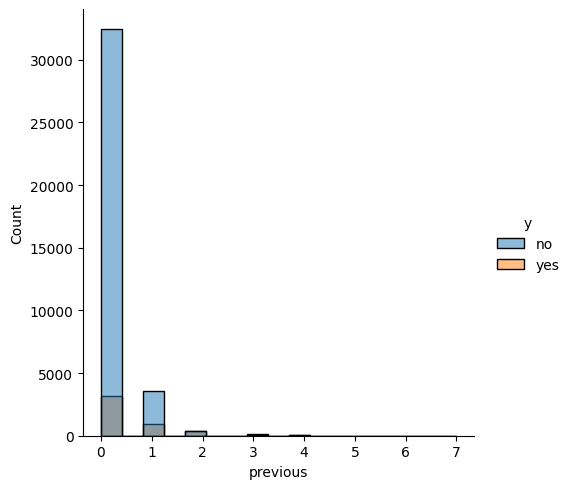

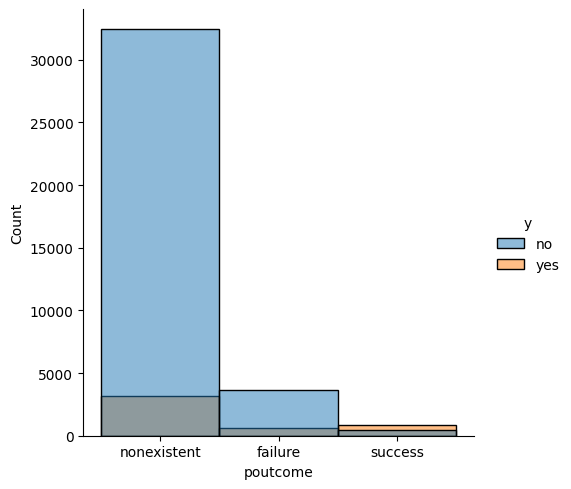

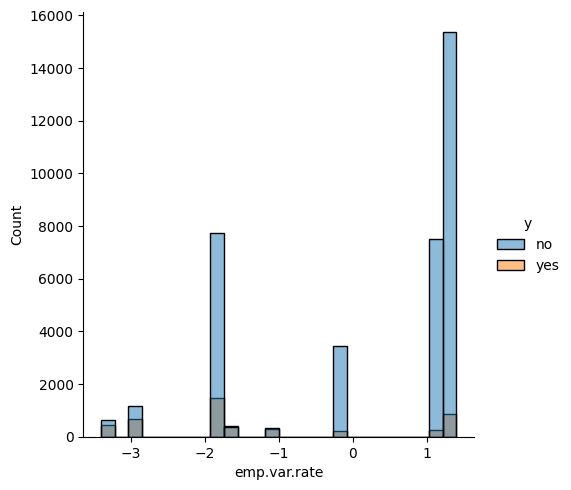

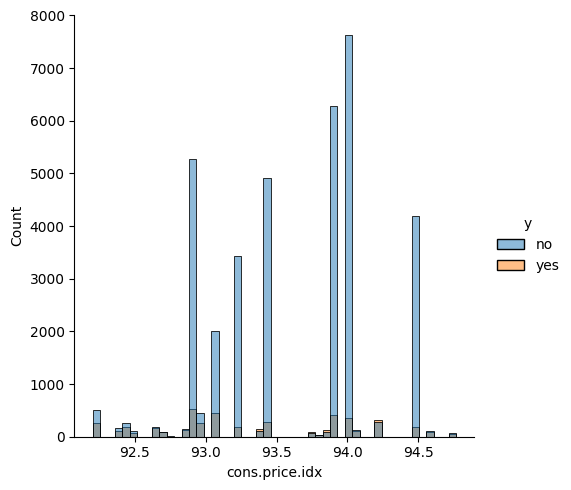

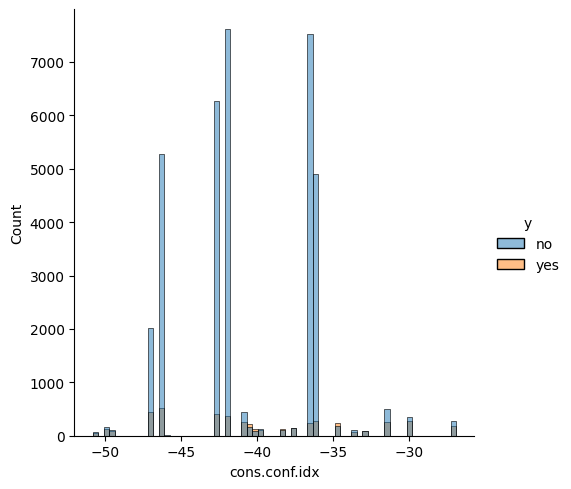

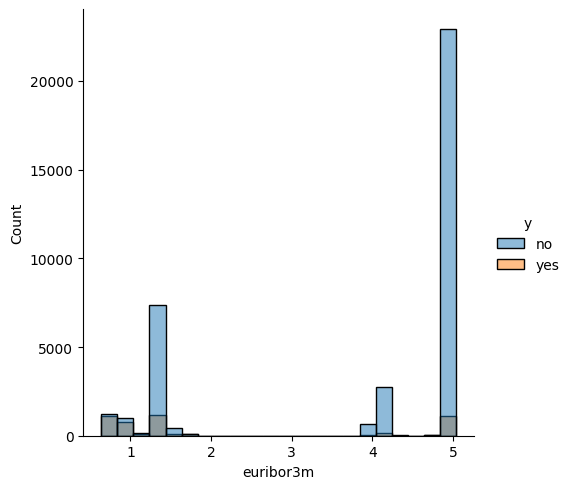

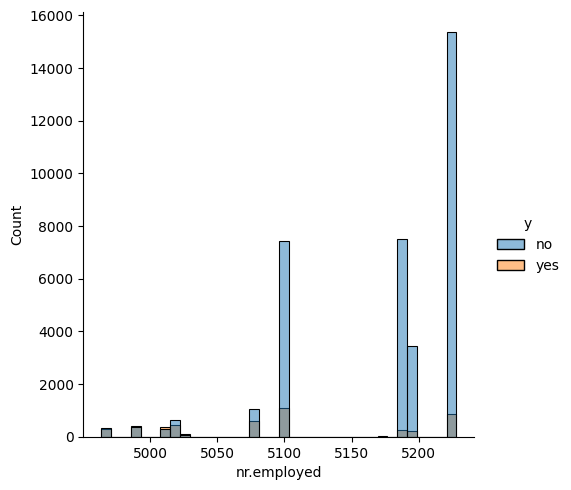

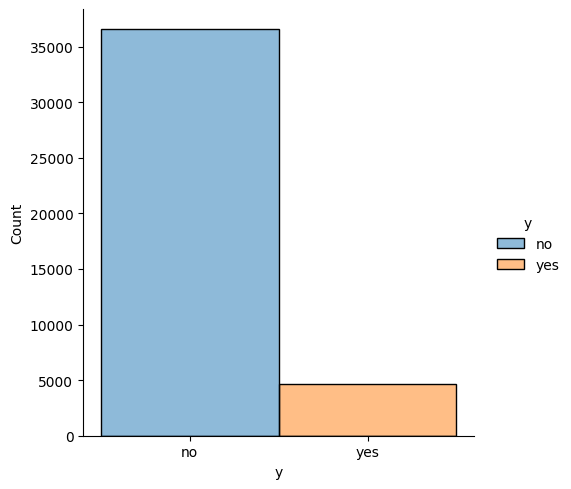

In [7]:
for cols in df.columns:
    sns.displot(df, x=cols, hue="y")

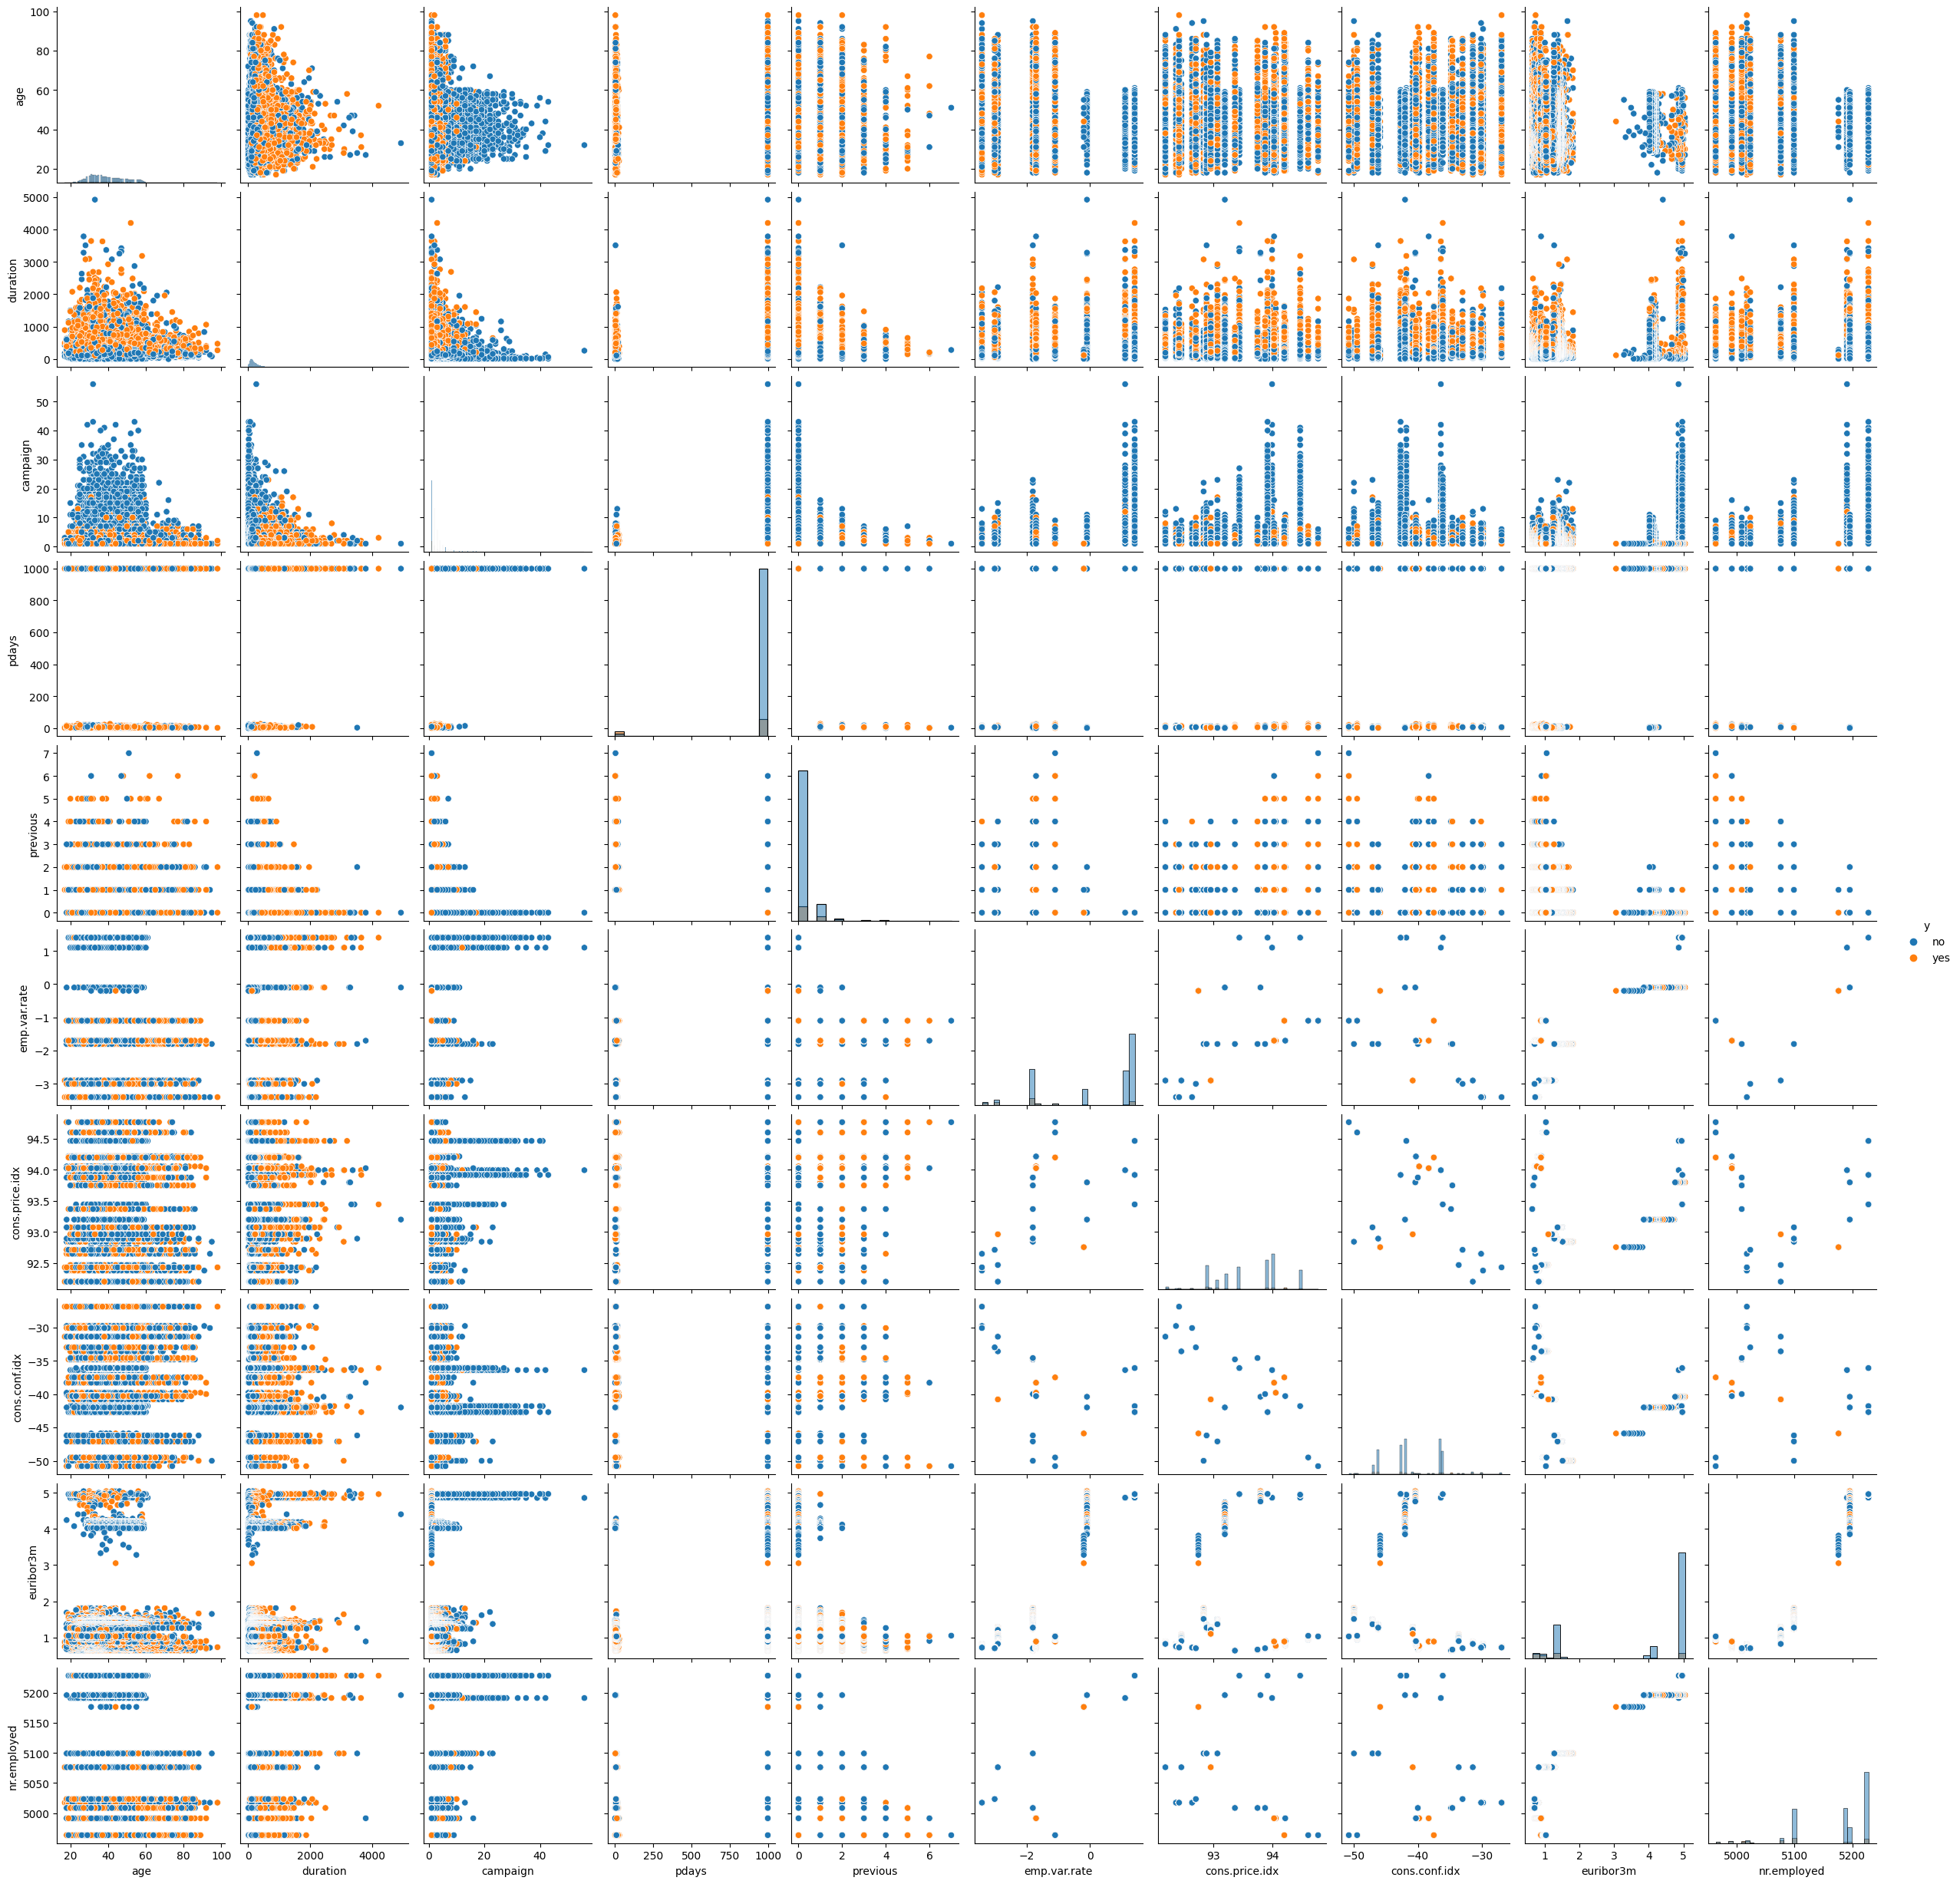

In [8]:
g = sns.pairplot(df, hue="y", diag_kind="hist")

In [68]:
df.dtypes

for columnName, columnData in df.select_dtypes(include='object').iteritems():
    print(columnName.upper())
    print(columnData.value_counts())
    print("\n========\n")

JOB
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


MARITAL
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


EDUCATION
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


DEFAULT
no         32588
unknown     8597
yes            3
Name: default, dtype: int64


HOUSING
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


LOAN
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64


CONTACT
cellular     26144
telephone    15044
Nam

In [10]:
df.groupby("y").mean()

age    duration  campaign       pdays  previous  emp.var.rate  \
y                                                                          
no   39.911185  220.844807  2.633085  984.113878  0.132374      0.248875   
yes  40.913147  553.191164  2.051724  792.035560  0.492672     -1.233448   

     cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
y                                                           
no        93.603757     -40.593097   3.811491  5176.166600  
yes       93.354386     -39.789784   2.123135  5095.115991

In [69]:
df["y"] = df["y"].replace({"yes":1,"no":0})
df["y"] = df["y"].astype("int")

def mean_sd(x):
    return np.sqrt(np.mean(x)*(1-np.mean(x))/len(x))

for cols in df.columns:
    res = df.groupby([cols])['y'].agg(['mean', mean_sd]).sort_values("mean",  ascending = False)
    print(res)

         mean   mean_sd
age                    
98   1.000000  0.000000
89   1.000000  0.000000
87   1.000000  0.000000
92   0.750000  0.216506
77   0.650000  0.106654
..        ...       ...
49   0.065554  0.008545
47   0.062500  0.007946
91   0.000000  0.000000
94   0.000000  0.000000
95   0.000000  0.000000

[78 rows x 2 columns]
                   mean   mean_sd
job                              
student        0.314286  0.015694
retired        0.252326  0.010473
unemployed     0.142012  0.010962
admin.         0.129726  0.003291
management     0.112175  0.005836
unknown        0.112121  0.017369
technician     0.108260  0.003784
self-employed  0.104856  0.008127
housemaid      0.100000  0.009214
entrepreneur   0.085165  0.007315
services       0.081381  0.004340
blue-collar    0.068943  0.002634
              mean   mean_sd
marital                     
unknown   0.150000  0.039922
single    0.140041  0.003227
divorced  0.103209  0.004480
married   0.101573  0.001913
               

In [82]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

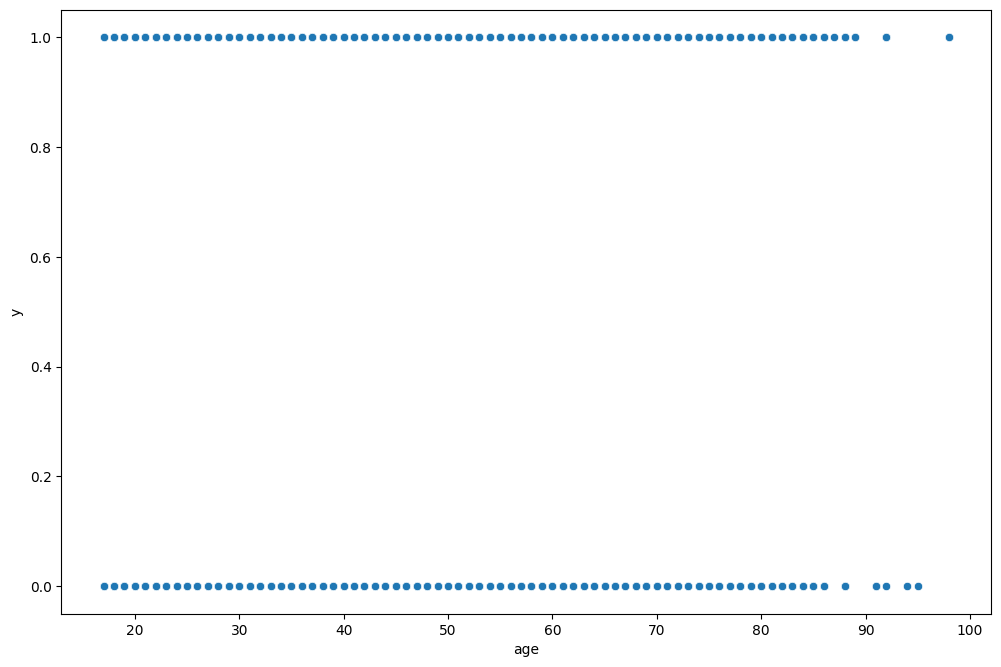

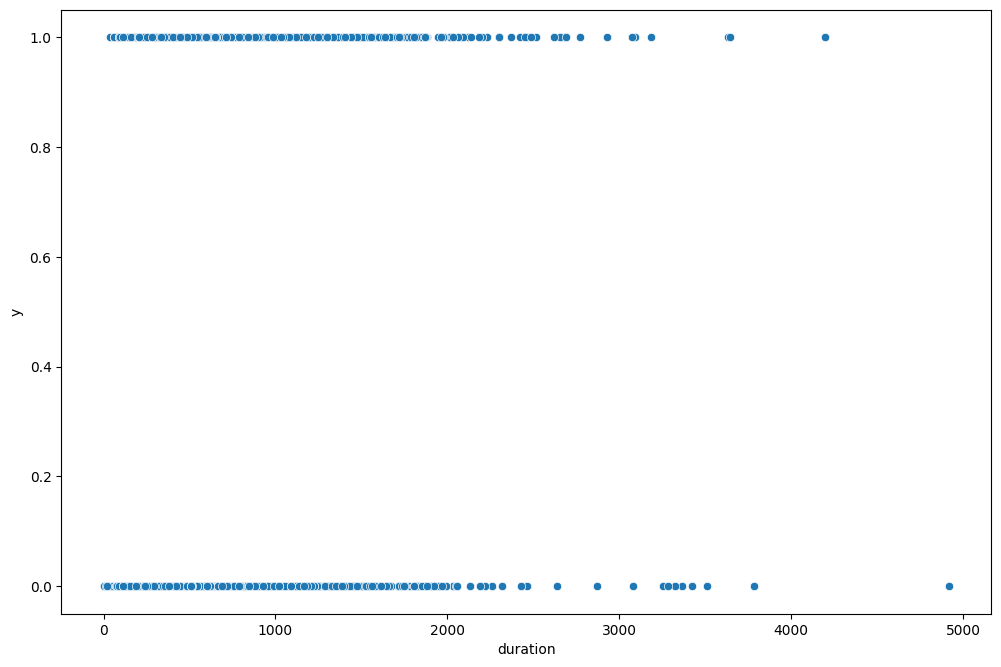

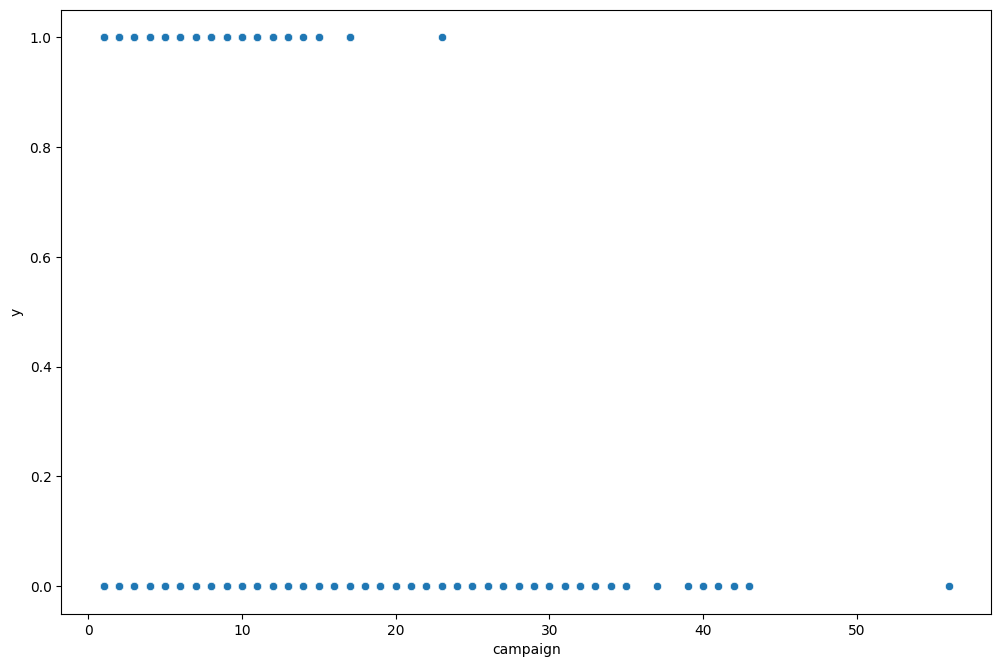

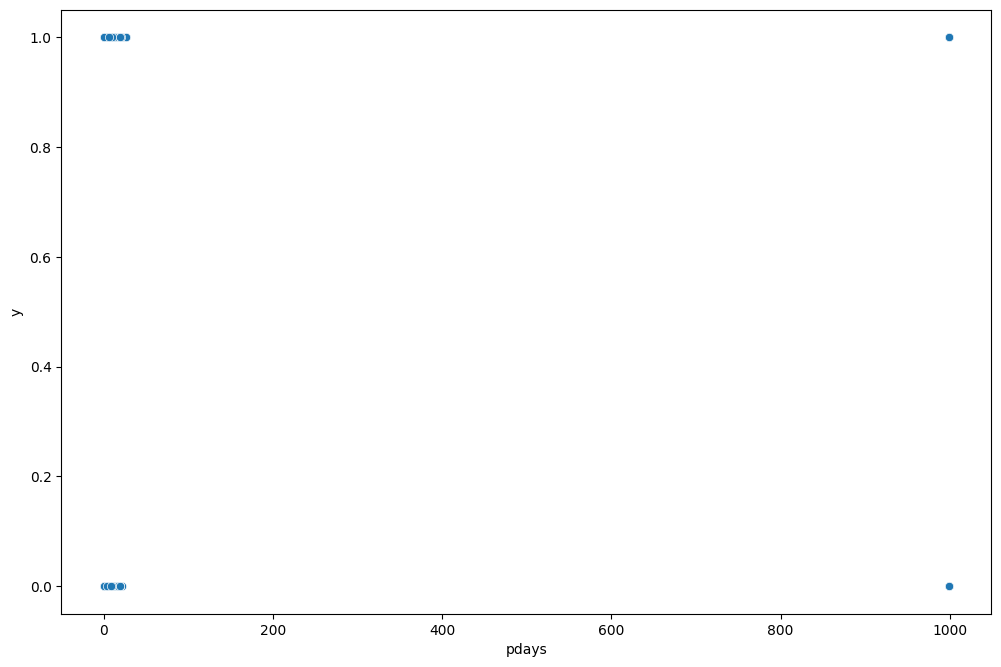

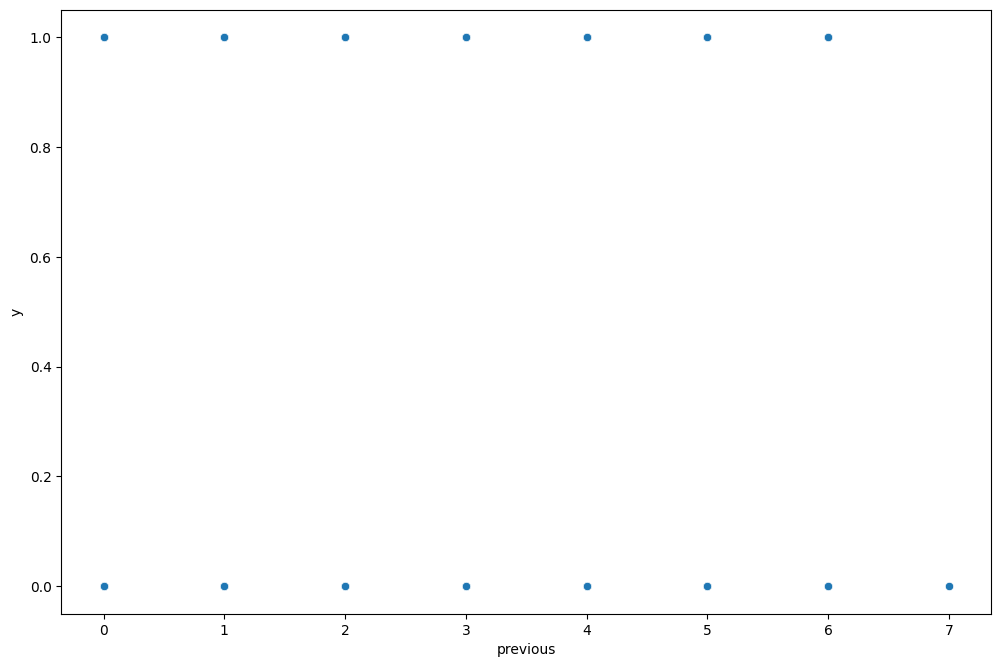

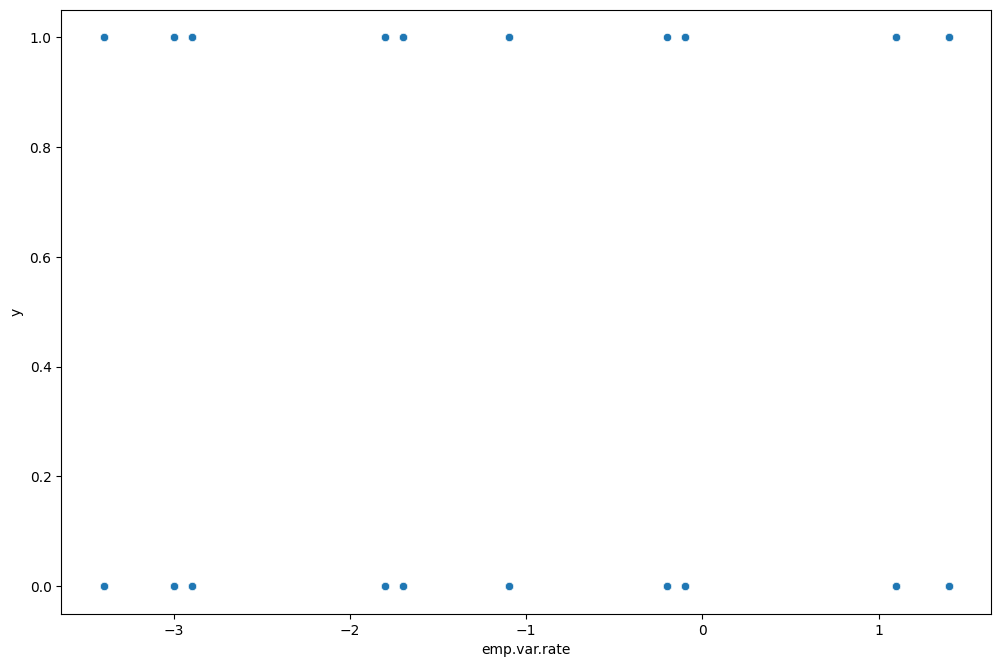

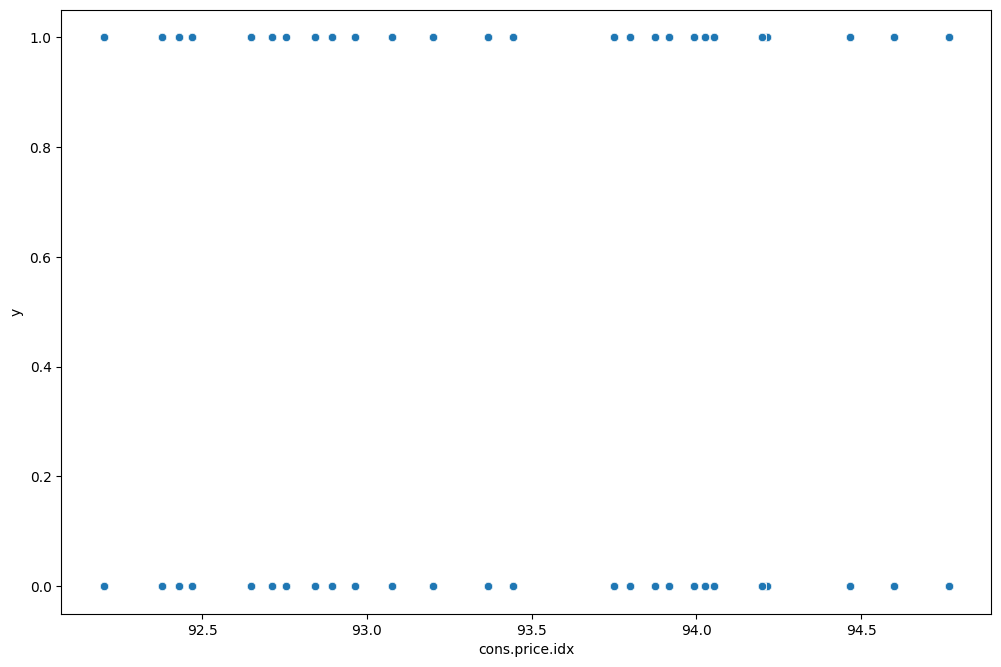

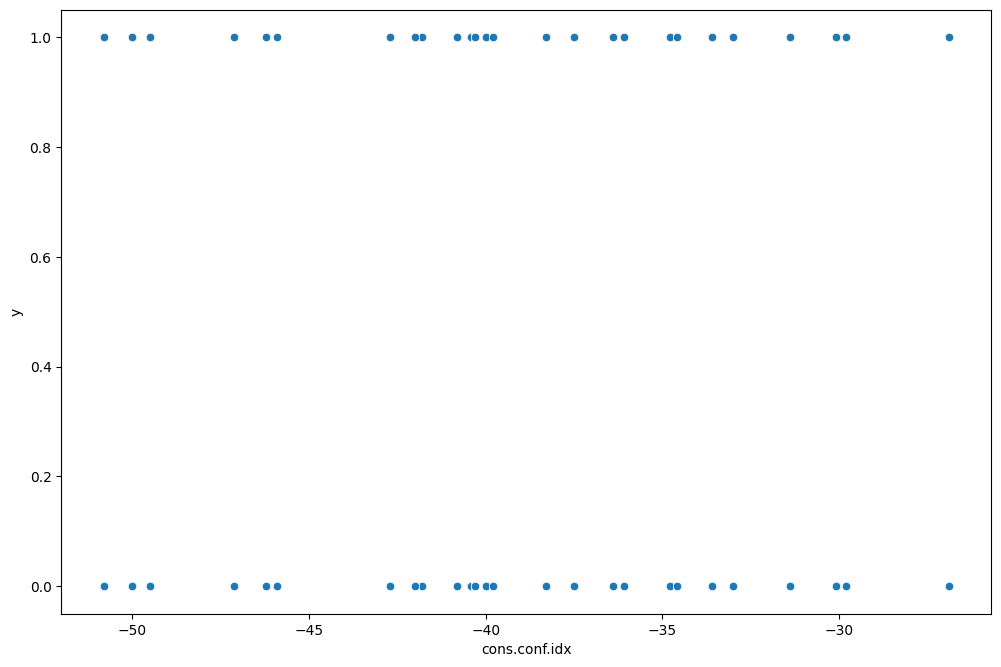

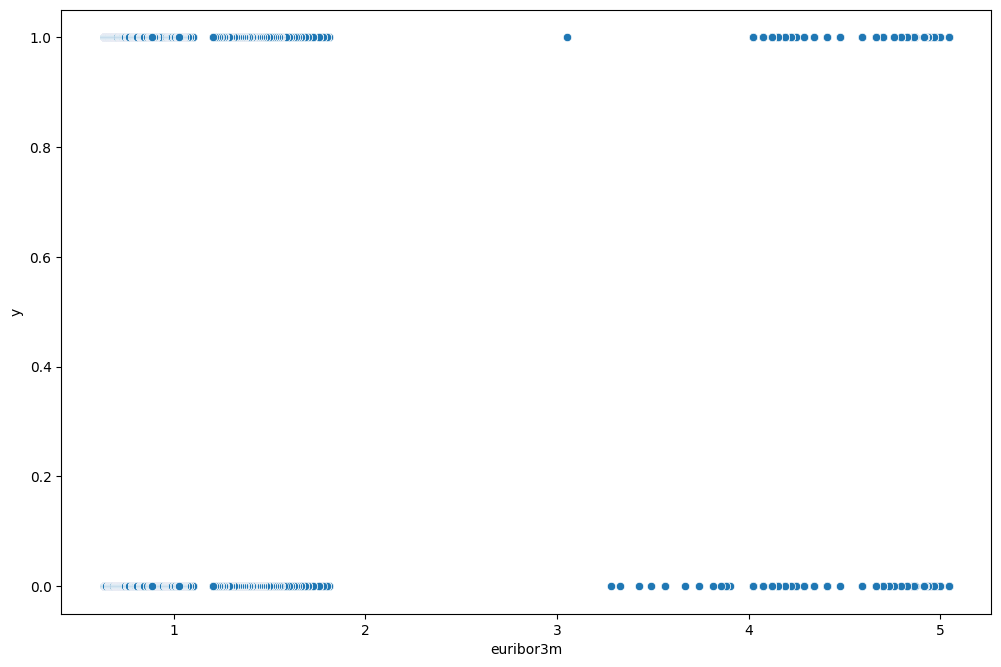

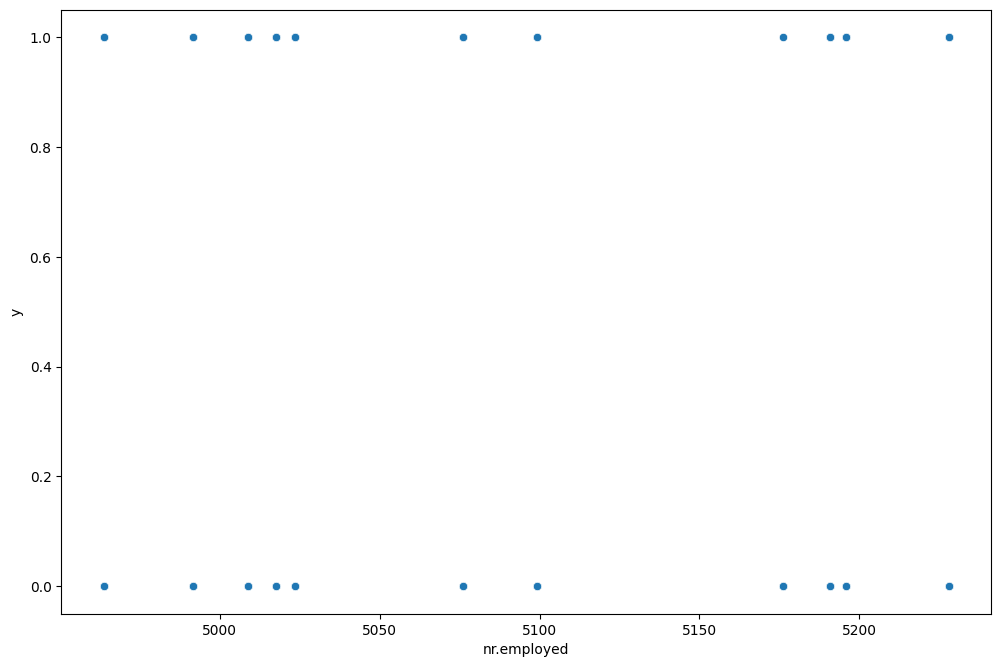

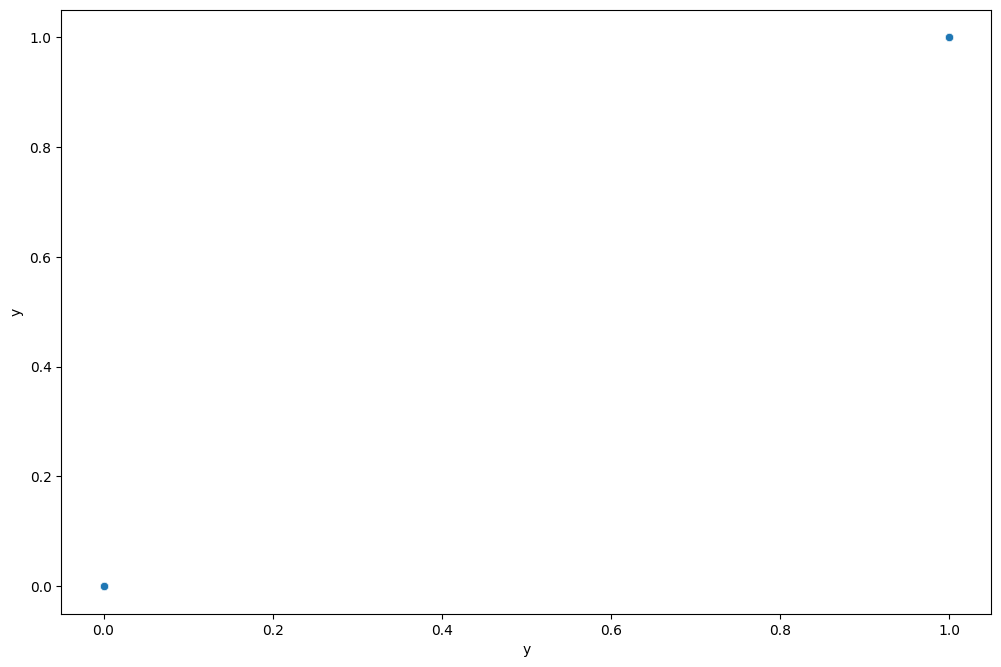

In [83]:
for colname, coldata in df.select_dtypes("number").iteritems():
    plt.figure()
    sns.scatterplot(data=df, x=colname, y="y")

In [38]:
X = df.drop(["y","duration"], axis = 1)
y = df["y"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state= random, stratify = y)

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [39]:
print(df_train.shape)
df_train.columns

(37069, 20)


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [40]:
from pycaret.classification import *
clf = setup(data = df_train, target = 'y', session_id = random, fix_imbalance = True)

Setup Succesfully Completed!


In [41]:
best_model = compare_models()

In [42]:
best_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [51]:
blender = blend_models(optimize="F1")

In [52]:
blender

VotingClassifier(estimators=[('Logistic Regression_0',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=123,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('K Neighbors Classifier_1',
                              KNeighborsClassifier(algorithm='aut...
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
           

In [46]:
bagged_clf = ensemble_model(best_model,method = 'Bagging')

In [63]:
gbt_model = create_model("gbc")

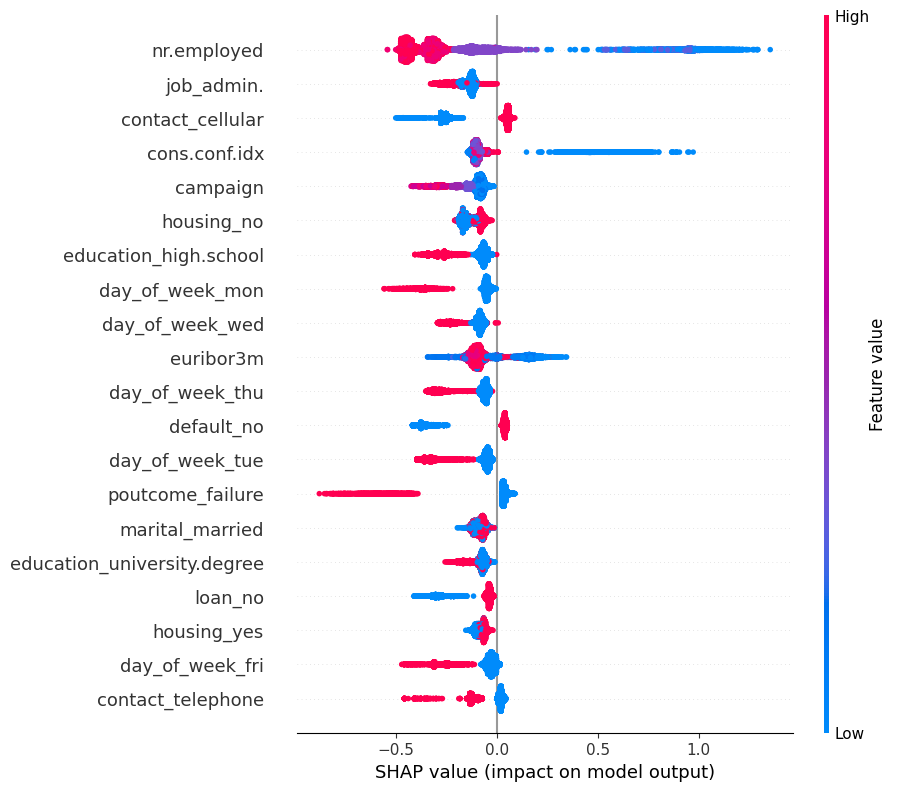

In [65]:
interpret_model(gbt_model)